# Header

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spinmob as s
from scipy import interpolate as interpolate
from scipy import integrate as integrate
import os
import camb
import time
#%matplotlib notebook

In [3]:
# check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

## Fonctions

In [4]:
# Gaussian fonction
def Gaus(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [5]:
# Box fonction
def Box(x,a=1,b=0,c=1):
    box = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=(b-c/2):
            box[i] = 0
        elif x[i]>=(b+c/2):
            box[i] = 0
        else:
            box[i] = a
    return box

# Question 1 (DONE)
Write a function that will shift an array by an arbitrary amount using a convolution (yes, I know there are easier ways to do this). The function should take 2 arguments - an array, and an amount by which to shift the array. Plot a gaussian that started in the centre of the array shifted by half the array length.

In [6]:
# Shifting fonction
def shift(A,dx):
    
    # Define a shifter; a "box function" array offset from 0 by dx:
    if dx>=0:
        shifter = np.append(np.zeros(dx),np.array(1))
        # Convolute the shifter with A[1]:
        shifted = np.convolve(shifter,A[1],mode="full")[:-dx]
        # Note: the [:-dx] assures that "shifted" has the same lenght that "A[0]"
    if dx<0:
        shifter = np.append(np.array([1]),np.zeros(-dx))
        # Convolute the shifter with A[1]:
        shifted = np.convolve(shifter,A[1],mode="full")[-dx:]
        # Note: the [-dx:] assures that "shifted" has the same lenght that "A[0]"
    
    # Return the shifted A[1]:
    return np.array([A[0],shifted])

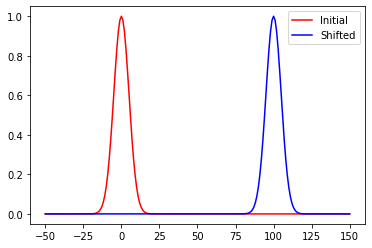

In [7]:
# Create the array for the Gausian test
size = 201
t0 = -50
tf = 150
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

# Shift the gaussian by half the using the Shift() fonction
array_g2 = shift(array_g1, int(len(array_g1[0])/2))
plt.plot(array_g1[0],array_g1[1],"r", label = "Initial")
plt.plot(array_g2[0],array_g2[1],"b", label = "Shifted")
plt.legend()

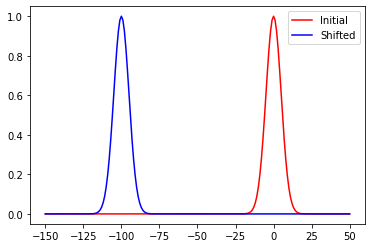

In [8]:
#Lets check that the function also works with neg. shift:
size = 201
t0 = -150
tf = 50
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

# Shift the gaussian by half the using the Shift() fonction
array_g2 = shift(array_g1, -int(len(array_g1[0])/2))
plt.plot(array_g1[0],array_g1[1],"r", label = "Initial")
plt.plot(array_g2[0],array_g2[1],"b", label = "Shifted")
plt.legend()

# Question 2 (DONE)
The correlation function $f\star g$ is $\int f(x)g(x+y)dx$. Through a similar proof, one can show $f\star g = if t(df t(f) ∗ conj(df t(g)))$. Write a routine to take the correlation function of two arrays. Plot the correlation function of a Gaussian with itself.

In [74]:
# Define correlation fonction
def Corr(A,B):
    C =  np.fft.ifft(np.fft.fft(A[1]) * np.conjugate(np.fft.fft(B[1])))
    return np.array([A[0],C])

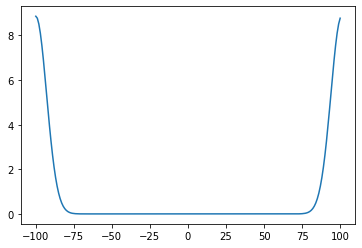

In [80]:
#define gaussian fonction
size = 201
t0 = -100
tf = 100
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

#Correlate the gaussian with itself
array_g2 = Corr(array_g1,array_g1)
plt.plot(array_g2[0],array_g2[1])

# Question 3 (Surprise?)
Using the results of part 1 and part 2, write a routine to take the correlation function of a Gaussian (shifted by an arbitrary amount) with itself. How does the correlation function depend on the shift? Does this surprise you?

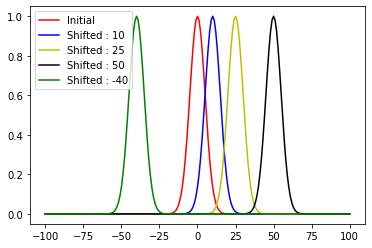

In [83]:
#Generate the first gaussian
size = 201
t0 = -100
tf = 100
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])
#Generate shifted gaussians with different shift
array_g2_10 = shift(array_g1, 10)
array_g2_25 = shift(array_g1, 25)
array_g2_50 = shift(array_g1, 50)
array_g2_m40 = shift(array_g1, -40)
#plot the created gaussians
plt.plot(array_g1[0],array_g1[1],"r", label = "Initial")
plt.plot(array_g2_10[0],array_g2_10[1],"b", label = "Shifted : 10")
plt.plot(array_g2_25[0],array_g2_25[1],"y", label = "Shifted : 25")
plt.plot(array_g2_50[0],array_g2_50[1],"k", label = "Shifted : 50")
plt.plot(array_g2_m40[0],array_g2_m40[1],"g", label = "Shifted : -40")
plt.legend()

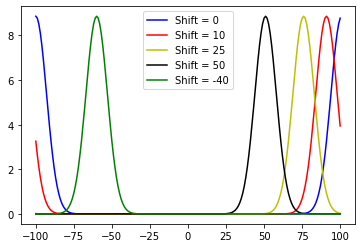

In [86]:
# Now correlate both gaussians
array_g3 = Corr(array_g1,array_g1)
array_g3_10 = Corr(array_g1,array_g2_10)
array_g3_25 = Corr(array_g1,array_g2_25)
array_g3_50 = Corr(array_g1,array_g2_50)
array_g3_m40 = Corr(array_g1,array_g2_m40)
plt.plot(array_g3[0],array_g3[1],"b",label="Shift = 0")
plt.plot(array_g3_10[0],array_g3_10[1],"r",label="Shift = 10")
plt.plot(array_g3_25[0],array_g3_25[1],"y",label="Shift = 25")
plt.plot(array_g3_50[0],array_g3_50[1],"k",label="Shift = 50")
plt.plot(array_g3_m40[0],array_g3_m40[1],"g",label="Shift = -40")
plt.legend()

The correlation is shifted as much as the second gaussian was shifted. 

# Question 4
The circulant (wrap-around) nature of the dft can sometimes be problematic. Write a routine to take the convolution of two arrays without any danger of wrapping around. You may wish to add zeros to the end of the input arrays.

In [117]:
# Define a convolution fonction without wrapping
def Conv_zero(A,B):
    dx = len(A[0])
    A_zeros = np.zeros(shape = (2, 3*dx))
    B_zeros = np.zeros(shape = (2, 3*dx))
    for i in range(2):
        A_zeros[i] = np.append(np.append(np.zeros(dx),A[i]),np.zeros(dx))
        B_zeros[i] = np.append(np.append(np.zeros(dx),B[i]),np.zeros(dx))
    C =  np.fft.ifft(np.fft.fft(A_zeros[1]) * (np.fft.fft(B_zeros[1])))
    # return the new A and B such that all A B C have the same lenght
    return np.array([A_zeros[0],A_zeros[1],B_zeros[1],C])

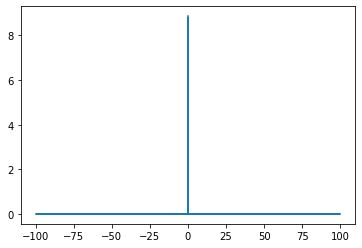

In [119]:
size = 201
t0 = -100
tf = 100
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

test = Conv_zero(array_g1,array_g1)
plt.plot(test[0],test[3])
np.

# Question 5
DFTs work very nicely out of the box when there are an integer number of periods of a wave in the region analyzed. Sadly, when we are dealing with real data, we usually are forced to analyze a finite chunk of data, and there will in general be no particular relation between the frequencies in the data and the interval we’re analyzing. We’ll look at the effects of this a bit now.

## a)
Show that:
$$\sum_{x=0}^{N-1}\exp(-2\pi ikx\big/N)=\frac{1-\exp(-2\pi ik)}{1-\exp(-2\pi ik\big/N)}$$
It may help to recognize that the sum can be re-written $\sumα^x$ where $α = \exp(−2πik\big/N)$ so we can treat it as the sum of a geometric series.

## b)
Show that this approaches N as k approaches zero, and is zero for any integer k that is not a multiple of N

## c)
We can use this to analytically write down the DFT of a non-integer sine wave. Pick a non-integer value of k and plot your analytic estimate of the DFT. Show that the FFT agrees (to within machine precision) with your analytic estimate. Normally, we think of the Fourier transform of a pure sine wave to be a delta function. Are we close to that? This phenomenon is usually known as _spectral leakage_.

## d)
A common tool to get around this is the use of window functions. The leakage essentially comes from the fact that we have a sharp jump at the edge of the interval. If we multiply our input data by a function that goes to zero 1 at the edges, this cancels out the jump, and so prevents the leakage from the jumps at the edges. Of course, since we have multiplied by the window in real space, we have convolved by it in Fourier space. One simple window we could use is $0.5 − 0.5 \cos(2πx/N)$ (there are many, many choices). Show that when we multiply by this window, the spectral leakage for a non-integer period sine wave drops dramatically

## e)
Show that the Fourier transform of the window is [N/2 N/4 0 ... 0 N/4] (either numerically or analytically). Use this to show that you can get the windowed Fourier transform by appropriate combinations of each point in the unwindowed Fourier transform and its immediate neighbors (you may need to be careful with signs here, since if you work through the math, some of the transforms need to be inverse FFTs). The choice of suitable windows is as much art as science (and depends on the details of what you’re most concerned about), but I hope this gives at flavor of what’s going on.